<a href="https://colab.research.google.com/github/vunky-himawan/PCVK/blob/main/Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 6 metode template matching

In [ ]:
cats_and_bunnies = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Object Detection/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Object Detection/cat2_templatejpg.jpg')

In [ ]:
def show_image_with_bounding_box(image, template, matching_result, is_black = False):
  image_copy = image.copy()
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(matching_result)

  h, w = template.shape[:2]

  # Menambahkan kotak pada gambar
  top_left = min_loc if is_black else max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv.rectangle(image_copy, top_left, bottom_right, color=(0, 0, 255), thickness=3)

  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.title("Matching Result")
  plt.axis("off")
  plt.imshow(matching_result, cmap='gray')

  plt.subplot(1, 2, 2)
  plt.axis("off")
  plt.title("Detected Point")
  plt.imshow(cv.cvtColor(image_copy, cv.COLOR_BGR2RGB))
  plt.show()

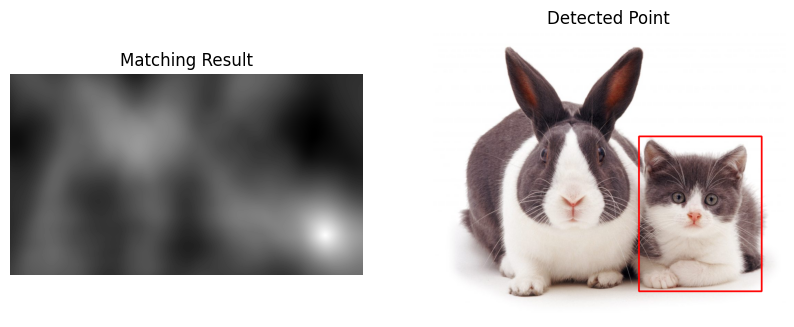

In [ ]:
ccoeff = cv.matchTemplate(cats_and_bunnies, template, cv.TM_CCOEFF)

show_image_with_bounding_box(cats_and_bunnies, template, ccoeff)

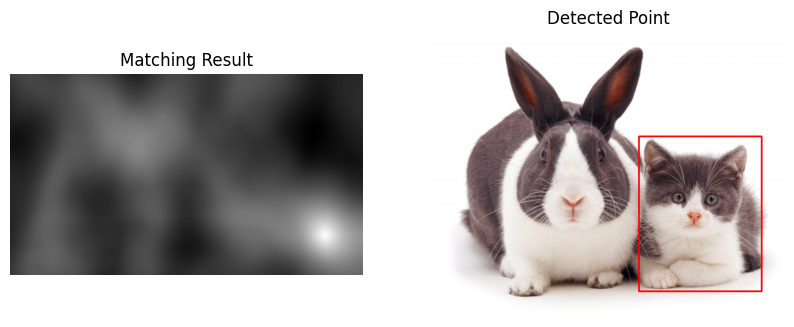

In [ ]:
ccoeff_normed = cv.matchTemplate(cats_and_bunnies, template, cv.TM_CCOEFF_NORMED)

show_image_with_bounding_box(cats_and_bunnies, template, ccoeff_normed)

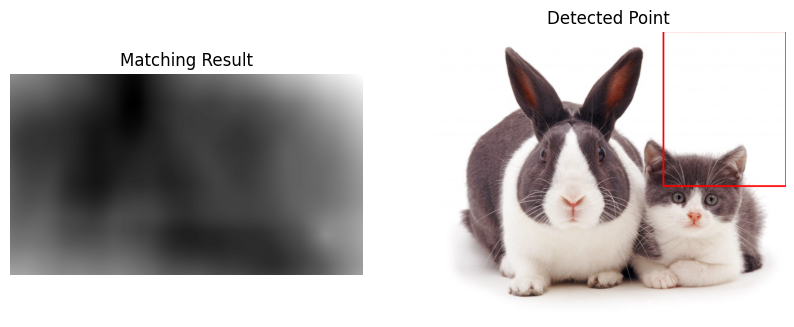

In [ ]:
ccorr = cv.matchTemplate(cats_and_bunnies, template, cv.TM_CCORR)

show_image_with_bounding_box(cats_and_bunnies, template, ccorr)

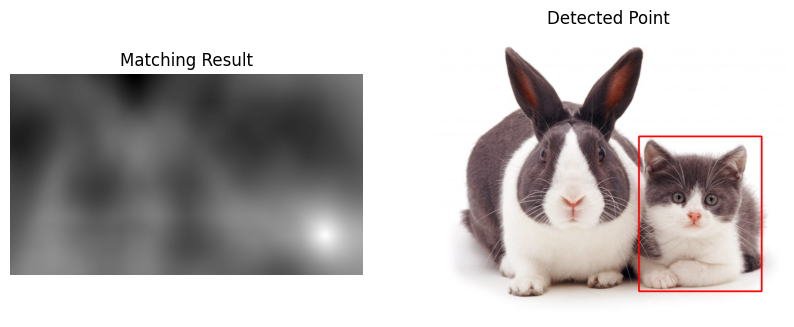

In [ ]:
ccorr_normed = cv.matchTemplate(cats_and_bunnies, template, cv.TM_CCORR_NORMED)

show_image_with_bounding_box(cats_and_bunnies, template, ccorr_normed)

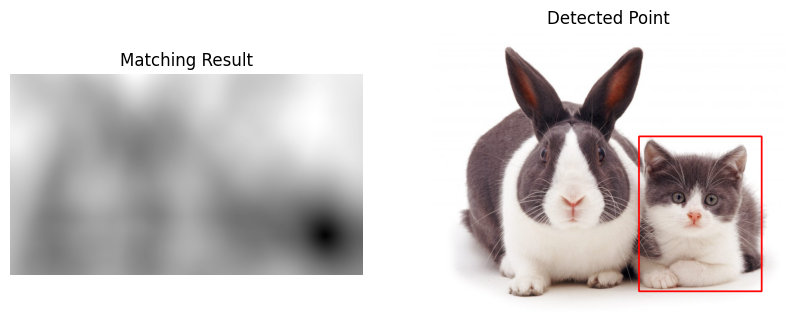

In [ ]:
sqdiff = cv.matchTemplate(cats_and_bunnies, template, cv.TM_SQDIFF)

show_image_with_bounding_box(cats_and_bunnies, template, sqdiff, is_black=True)

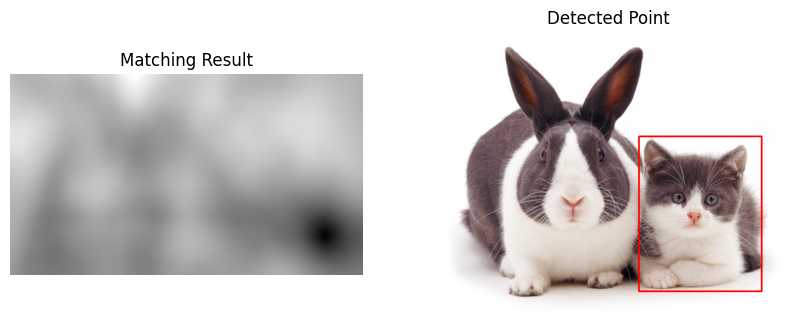

In [ ]:
sqdiff_normed = cv.matchTemplate(cats_and_bunnies, template, cv.TM_SQDIFF_NORMED)

show_image_with_bounding_box(cats_and_bunnies, template, sqdiff_normed, is_black=True)

# 2. Template matching multiple object

In [ ]:
# Baca gambar input dan template
input_image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Object Detection/bahrain.jpg')
template_image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Object Detection/bahrain-template.jpg')

In [ ]:
def template_matching(input_image, template_images, initial_threshold=350000, max_threshold=7000000, threshold_increment=50000):
    matched_locations = []

    input_image_gray = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

    template_grays = [cv.cvtColor(template, cv.COLOR_BGR2GRAY) for template in template_images]

    for template_gray in template_grays:
        template_height, template_width = template_gray.shape
        threshold = initial_threshold
        found_match = False

        height_range = input_image_gray.shape[0] - template_height
        width_range = input_image_gray.shape[1] - template_width

        while not found_match and threshold <= max_threshold:
            current_loop = 0

            for i in range(0, height_range, 2):
                if found_match and current_loop >= 5:
                    break

                for j in range(0, width_range, 2):
                    subregion = input_image_gray[i:i + template_height, j:j + template_width]

                    ssd = np.sum((subregion - template_gray) ** 2)

                    if ssd < threshold:
                        current_loop += 1
                        matched_locations.append((i, j))
                        found_match = True

                        if current_loop >= 5:
                            break

            threshold += threshold_increment

    return matched_locations

In [ ]:
def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv.warpAffine(image, rotation_matrix, (width, height),
                                 flags=cv.INTER_LINEAR)
    return rotated_image

In [ ]:
augmented_templates = [
    template_image,
    np.fliplr(rotate_image(template_image, 110)),
    rotate_image(template_image, 300),
    np.fliplr(rotate_image(template_image, 160)),
    rotate_image(template_image,240),
    np.fliplr(rotate_image(template_image,230)),
]

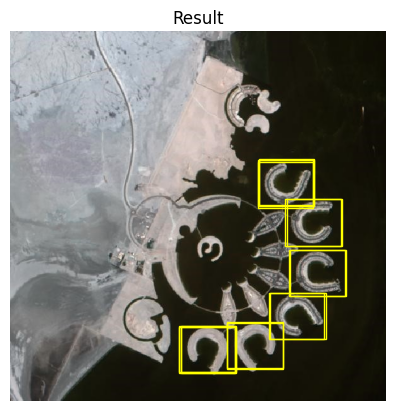

In [ ]:
matched_locations = template_matching(input_image, augmented_templates)

fig, ax = plt.subplots()
ax.imshow(input_image, cmap='gray')

template_height, template_width, _ = template_image.shape

for (i, j) in matched_locations:
    rect = plt.Rectangle((j, i), template_width, template_height,
                        edgecolor='yellow', facecolor='none', linewidth=1)
    ax.add_patch(rect)

plt.title("Result")
plt.axis("off")
plt.show()

# 3. Edge Detection

In [ ]:
car = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Object Detection/car-park.jpg')
car = cv.cvtColor(car, cv.COLOR_BGR2RGB)
car_gray = cv.cvtColor(car, cv.COLOR_BGR2GRAY)

# Sobel

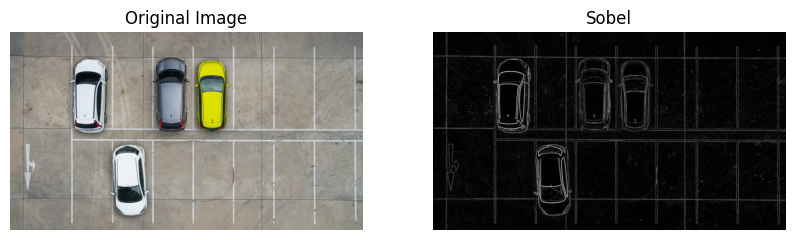

In [ ]:
sobel_x = cv.Sobel(car_gray, cv.CV_64F, 1, 0, ksize=3)

sobel_y = cv.Sobel(car_gray, cv.CV_64F, 0, 1, ksize=3)

sobel_combined = cv.magnitude(sobel_x, sobel_y)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(car)
plt.title('Original Image'), plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel'), plt.axis('off')

plt.show()

# Canny

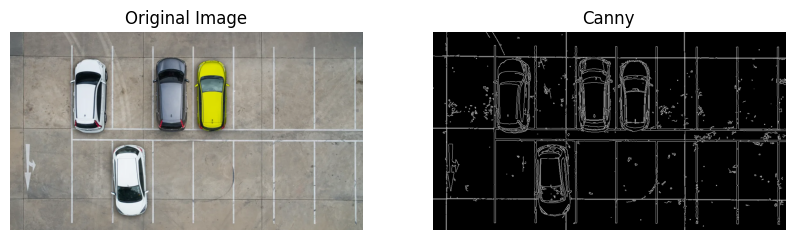

In [ ]:
low_threshold = 50
high_threshold = 150
edges = cv.Canny(car_gray, low_threshold, high_threshold)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(car)
plt.title('Original Image'), plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny'), plt.axis('off')
plt.show()

# Laplacian

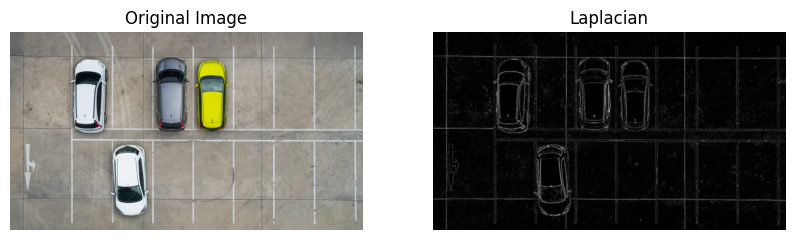

In [ ]:
laplacian = cv.Laplacian(car_gray, cv.CV_64F)

laplacian_abs = cv.convertScaleAbs(laplacian)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(car)
plt.title('Original Image'), plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian'), plt.axis('off')
plt.show()

# 4. Metode Harris Corner Detection dan Shi-Tomasi Detection

In [ ]:
chess_board = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Object Detection/chess-board.jpg')
chess_board_gray = cv.cvtColor(chess_board, cv.COLOR_BGR2GRAY)

# Harris Corner Detection

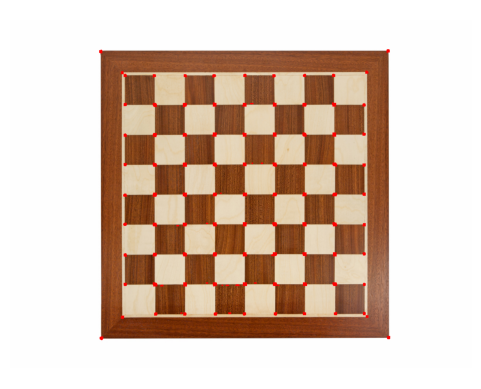

In [ ]:
harris_corner_result = chess_board.copy()

gray = np.float32(chess_board_gray)

dst = cv.cornerHarris(gray, 5, 3, 0.04)

dst = cv.dilate(dst, None)

harris_corner_result[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.imshow(cv.cvtColor(harris_corner_result, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Shi-Tomasi Detection

<ipython-input-23-184bb4384bf0>:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


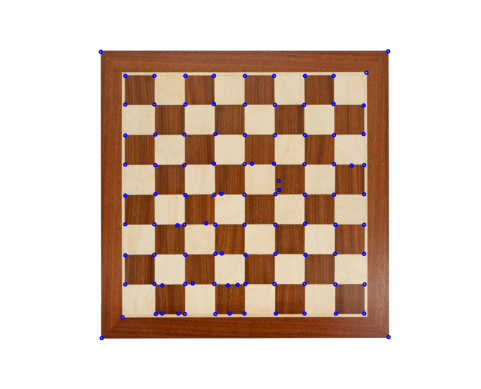

In [ ]:
shi_tomasi_result = chess_board.copy()
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)

corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv.circle(shi_tomasi_result, (x, y), 3, (255, 0, 0), 2)

plt.imshow(cv.cvtColor(shi_tomasi_result, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 5. Hough Transform

In [ ]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Object Detection/sudoku.jpg')

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, threshold1=100, threshold2=140)

In [ ]:
lines = cv.HoughLines(edges, rho=1, theta=np.pi / 180, threshold=140)

image_with_lines = image.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

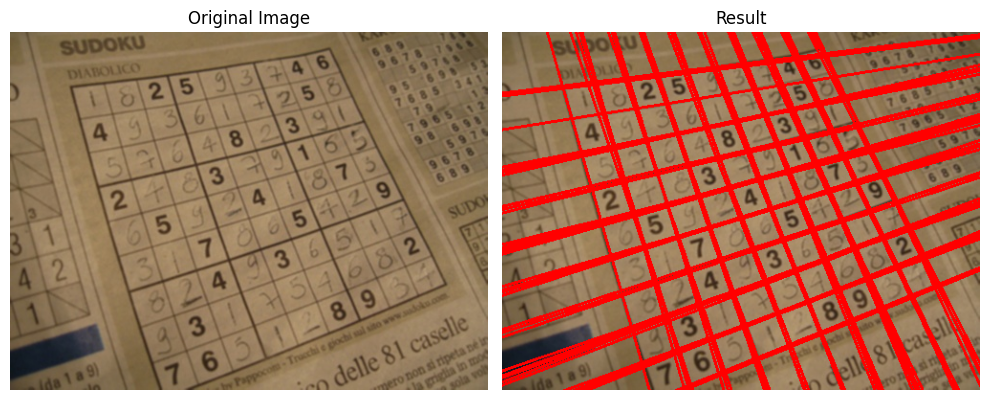

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(image_with_lines, cv.COLOR_BGR2RGB))
plt.title("Result")
plt.axis("off")

plt.tight_layout()
plt.show()

# 6. Fungsi findContours()

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/PCVK/Object Detection/laptop.jpg'
image = cv.imread(image_path)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [ ]:
edges = cv.Canny(gray, 75, 200)

contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

contour_image = image.copy()
cv.drawContours(contour_image, contours, -5, (0, 0, 255), 5)

array([[[199, 214, 162],
        [199, 214, 162],
        [199, 214, 162],
        ...,
        [200, 198, 178],
        [200, 198, 178],
        [200, 198, 178]],

       [[199, 214, 162],
        [199, 214, 162],
        [199, 214, 162],
        ...,
        [200, 198, 178],
        [200, 198, 178],
        [200, 198, 178]],

       [[199, 214, 162],
        [199, 214, 162],
        [199, 214, 162],
        ...,
        [200, 198, 178],
        [200, 198, 178],
        [200, 198, 178]],

       ...,

       [[ 38,  33,  61],
        [ 38,  33,  61],
        [ 38,  33,  61],
        ...,
        [ 81,  78,  81],
        [ 81,  78,  81],
        [ 81,  78,  81]],

       [[ 38,  33,  61],
        [ 38,  33,  61],
        [ 38,  33,  61],
        ...,
        [ 81,  78,  81],
        [ 81,  78,  81],
        [ 81,  78,  81]],

       [[ 38,  33,  61],
        [ 38,  33,  61],
        [ 38,  33,  61],
        ...,
        [ 81,  78,  81],
        [ 81,  78,  81],
        [ 81,  78,  81]]

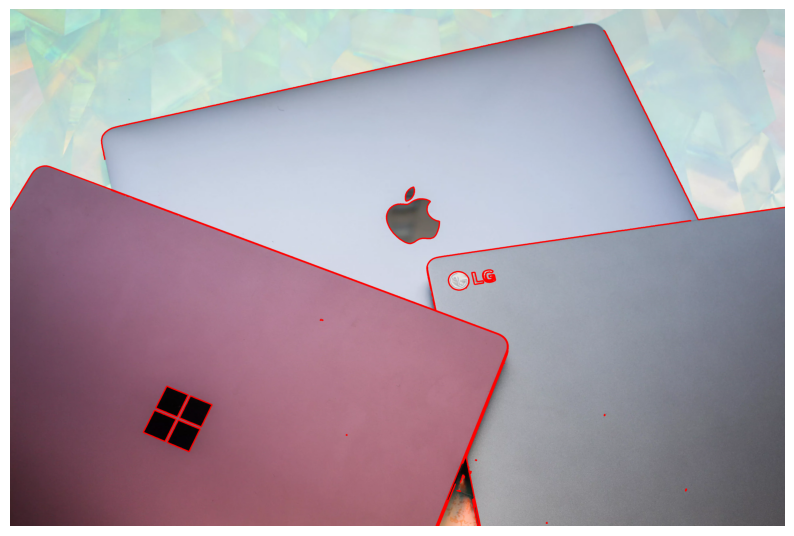

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(contour_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 7. Pengayaan Materi KTP

In [ ]:
ktp = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/ktp3.png')

blurred = ktp.copy()
gray = blurred.copy()

In [ ]:
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

In [ ]:
ret, bw = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret, bw.shape)

168.0 (300, 493)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
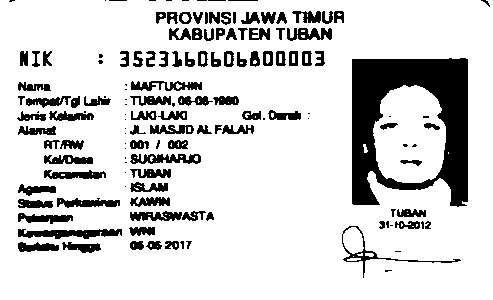

In [ ]:
bw

In [ ]:
kernel = np.ones((2, 2), np.uint8)
morph_image = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

final_image = cv.bitwise_not(morph_image)

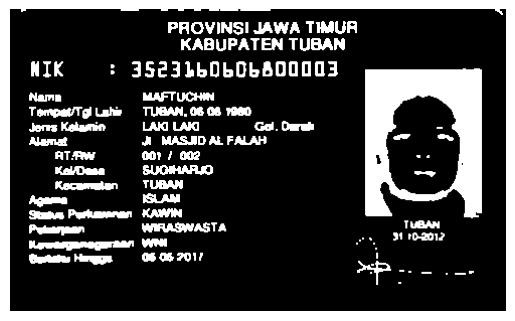

In [ ]:
plt.imshow(final_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
contours, hierarchy = cv.findContours(final_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
min_area = 55
max_area = 130
aspect_ratio_range = (0.01, 0.9)

output_image = ktp.copy()

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)

    area = cv.contourArea(contour)
    aspect_ratio = float(w) / h

    if min_area <= area <= max_area and aspect_ratio_range[0] <= aspect_ratio <= aspect_ratio_range[1]:
        cv.rectangle(output_image, (x, y), (x + w, y + h), (0, 0, 255), 1)

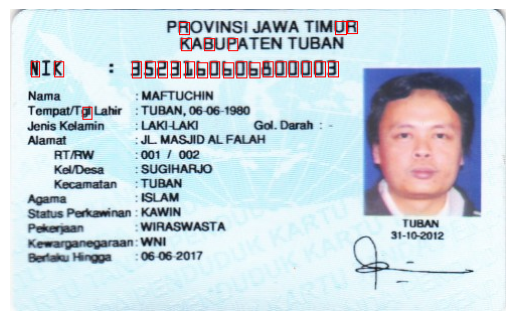

In [ ]:
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 8. Tugas Praktikum

In [ ]:
ktp = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/ktp1.png')

blurred = ktp.copy()
gray = blurred.copy()

In [ ]:
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

In [ ]:
ret, bw = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret, bw.shape)

88.0 (338, 600)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
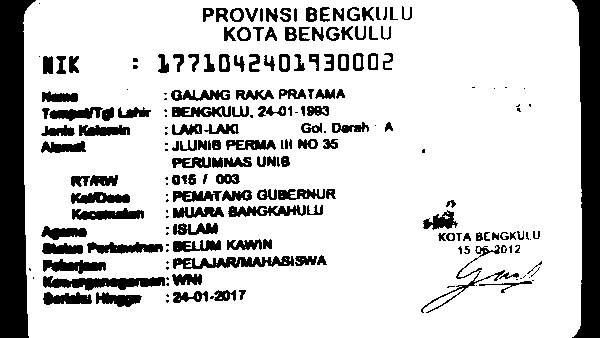

In [ ]:
bw

In [ ]:
kernel = np.ones((2, 2), np.uint8)
morph_image = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

final_image = cv.bitwise_not(morph_image)

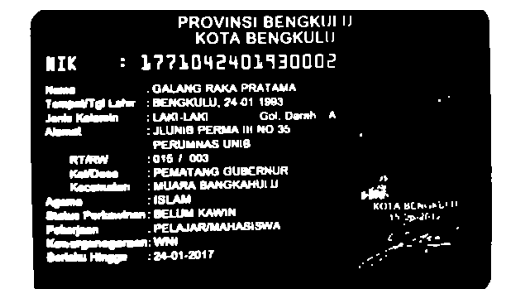

In [ ]:
plt.imshow(final_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
contours, hierarchy = cv.findContours(final_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
min_area = 55
max_area = 130
aspect_ratio_range = (0.01, 0.9)

output_image = ktp.copy()

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)

    area = cv.contourArea(contour)
    aspect_ratio = float(w) / h

    if min_area <= area <= max_area and aspect_ratio_range[0] <= aspect_ratio <= aspect_ratio_range[1]:
        cv.rectangle(output_image, (x, y), (x + w, y + h), (0, 0, 255), 1)

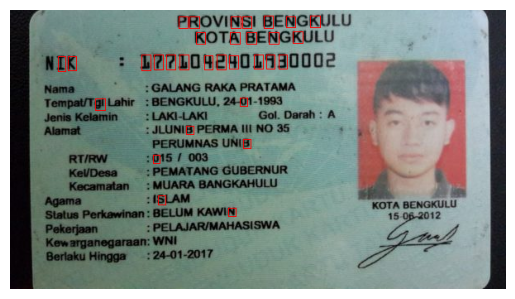

In [ ]:
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()